## Import Libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from matplotlib import pyplot as plt

2024-08-07 19:24:36.229859: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
fashion_dataset = keras.datasets.fashion_mnist

In [101]:
train_val_data,test_data=fashion_dataset.load_data()

In [102]:
X_train_val,y_train_val = train_val_data

In [103]:
X_train_val.shape

(60000, 28, 28)

In [104]:
X_train_val.dtype

dtype('uint8')

## Let's create train and validation data
### Scale Data Between 0 and 1 intead of 0 - 255

In [105]:
X_valid,X_train = X_train_val[:5000]/255.,X_train_val[5000:]/255.
y_valid,y_train = y_train_val[:5000],y_train_val[5000:]
X_test = test_data[0]/255.
y_test = test_data[1]

In [106]:
X_valid.shape

(5000, 28, 28)

In [107]:
X_train.shape

(55000, 28, 28)

In [108]:
X_test.shape

(10000, 28, 28)

In [109]:
y_test.shape

(10000,)

In [110]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

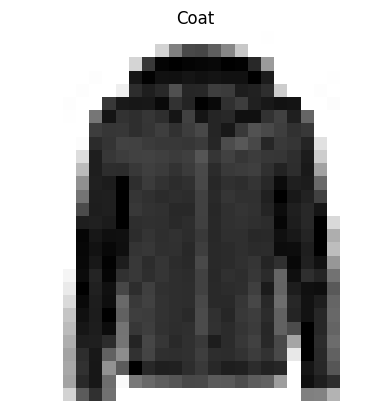

In [111]:
plt.imshow(X_train[0],cmap="binary")
plt.title(class_names[y_train[0]])
plt.axis("off")
plt.show()

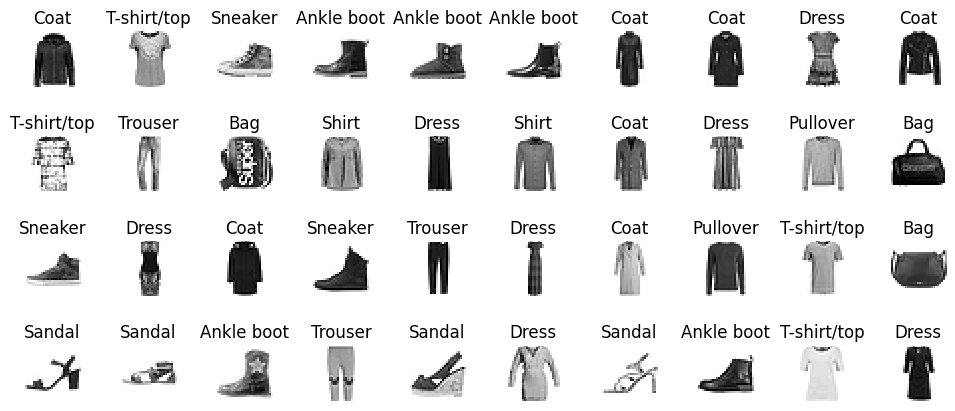

In [112]:
n_rows=4
n_cols=10
plt.figure(figsize=(n_cols*1.2 ,n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        idx = row*n_cols+col
        plt.subplot(n_rows,n_cols,idx+1)
        plt.imshow(X_train[idx],cmap="binary",interpolation="nearest")
        plt.axis("off")
        title = class_names[y_train[idx]]
        plt.title(title)
plt.subplots_adjust(wspace=0.5,hspace=0.9)
plt.show()

In [113]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [28,28]))
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10,activation="softmax"))


/Users/yakupcanergen/Projects/Machine Learning Projects/hands_on_ml_projects/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [114]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [115]:
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [116]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

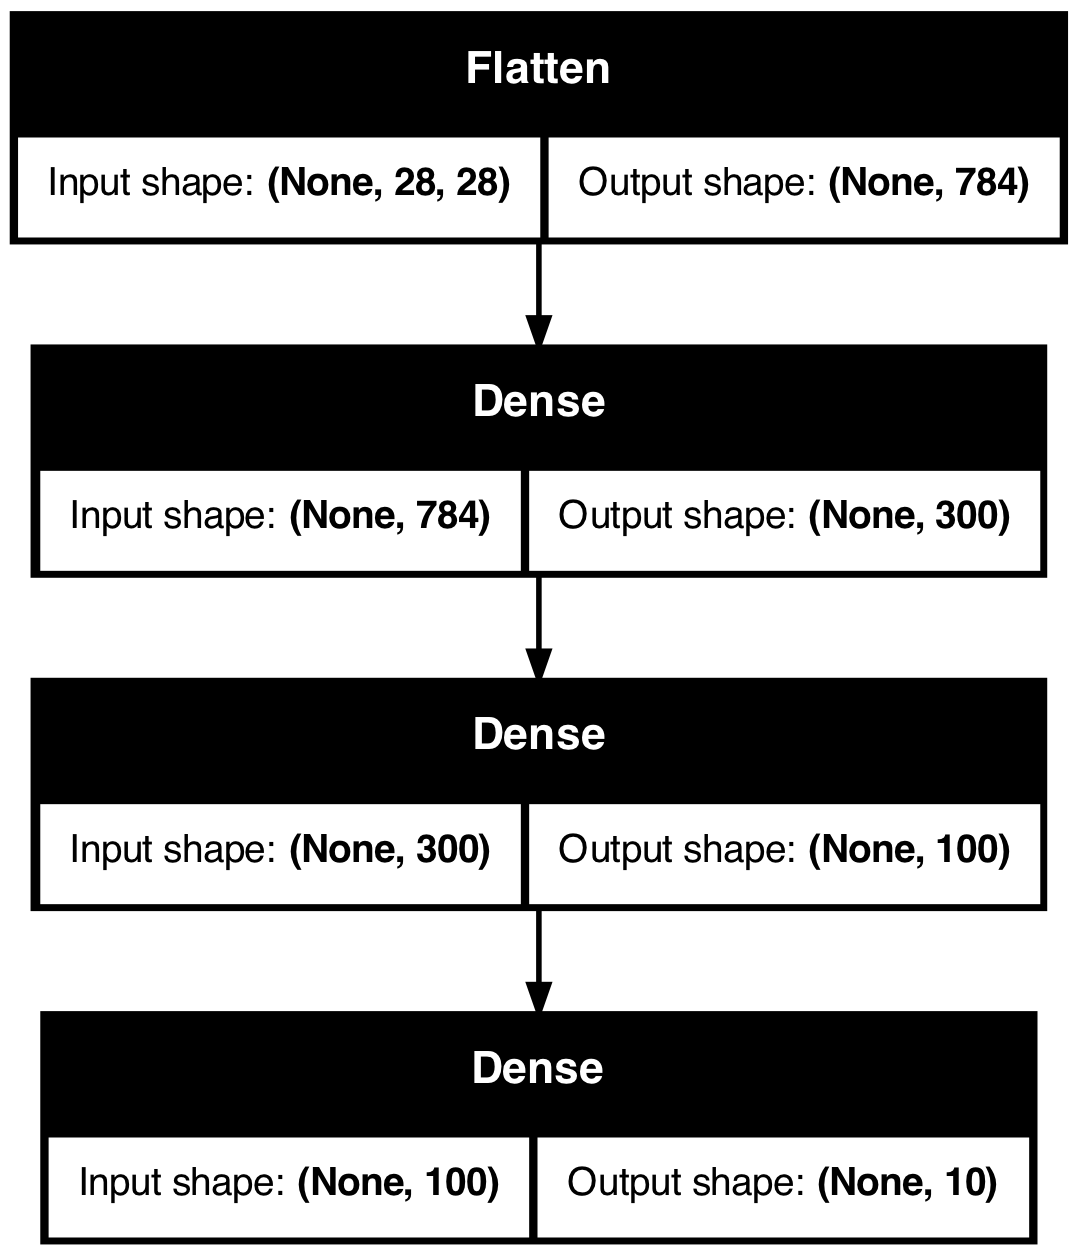

In [59]:
keras.utils.plot_model(model,"fashion_mnist_model.png",show_shapes=True)

In [89]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [90]:
model.get_layer(hidden1.name) is hidden1

True

In [91]:
weights,biases=hidden1.get_weights()

In [92]:
weights.shape

(784, 300)

In [93]:
biases.shape

(300,)

In [117]:
opt=keras.optimizers.SGD(learning_rate=0.001,weight_decay=1e-5,momentum=0.4)

In [118]:
model.compile(loss="sparse_categorical_crossentropy",optimizer=opt,metrics=["accuracy"])

In [119]:
history=model.fit(X_train,y_train,epochs=100,validation_data=(X_valid,y_valid))

Epoch 1/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.4726 - loss: 1.6777 - val_accuracy: 0.7480 - val_loss: 0.7995
Epoch 2/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7543 - loss: 0.7589 - val_accuracy: 0.7956 - val_loss: 0.6377
Epoch 3/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7905 - loss: 0.6308 - val_accuracy: 0.8178 - val_loss: 0.5702
Epoch 4/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8085 - loss: 0.5708 - val_accuracy: 0.8280 - val_loss: 0.5309
Epoch 5/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8189 - loss: 0.5341 - val_accuracy: 0.8352 - val_loss: 0.5041
Epoch 6/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8267 - loss: 0.5086 - val_accuracy: 0.8390 - val_loss: 0.4848
Epoch 7/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8324 - loss: 0.4896 - val_accuracy: 0.8440 - val_loss: 0.4700
Epoch 8/100
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8370 - loss: 0

In [66]:
history.params

{'verbose': 'auto', 'epochs': 30, 'steps': 1719}

In [28]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [29]:
history.history["accuracy"]

[0.6404545307159424,
 0.7710727453231812,
 0.8020727038383484,
 0.8149454593658447,
 0.8240727186203003,
 0.8299272656440735,
 0.8355636596679688,
 0.839090883731842,
 0.8425636291503906,
 0.8450727462768555,
 0.8473091125488281,
 0.8495272994041443,
 0.8522909283638,
 0.8542909026145935,
 0.8557636141777039,
 0.8574000000953674,
 0.8593272566795349,
 0.860945463180542,
 0.8622909188270569,
 0.863490879535675,
 0.8648363351821899,
 0.8661454319953918,
 0.8671454787254333,
 0.8682363629341125,
 0.869563639163971,
 0.8706363439559937,
 0.8714181780815125,
 0.8724363446235657,
 0.873199999332428,
 0.8740000128746033]

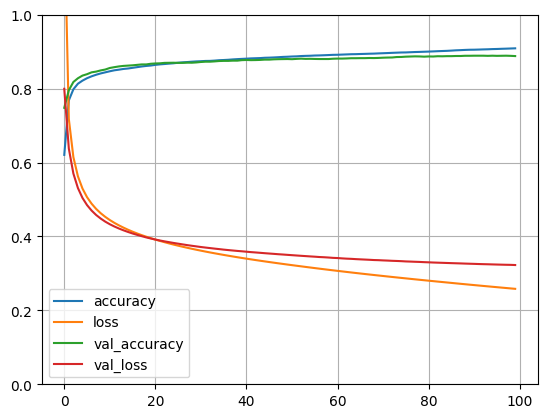

In [120]:
import pandas as pd
pd.DataFrame(history.history).plot()
plt.grid(True)
plt.ylim((0,1))
plt.show()

In [121]:
test_loss,test_acc=model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8778 - loss: 0.3508


In [78]:
print(f"Test Loss:{test_loss} | Accuracy:{test_acc}")

Test Loss:0.4578059911727905 | Accuracy:0.8773999810218811


In [132]:
test_pred = model.predict(X_test)
test_pred = np.argmax(test_pred,axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


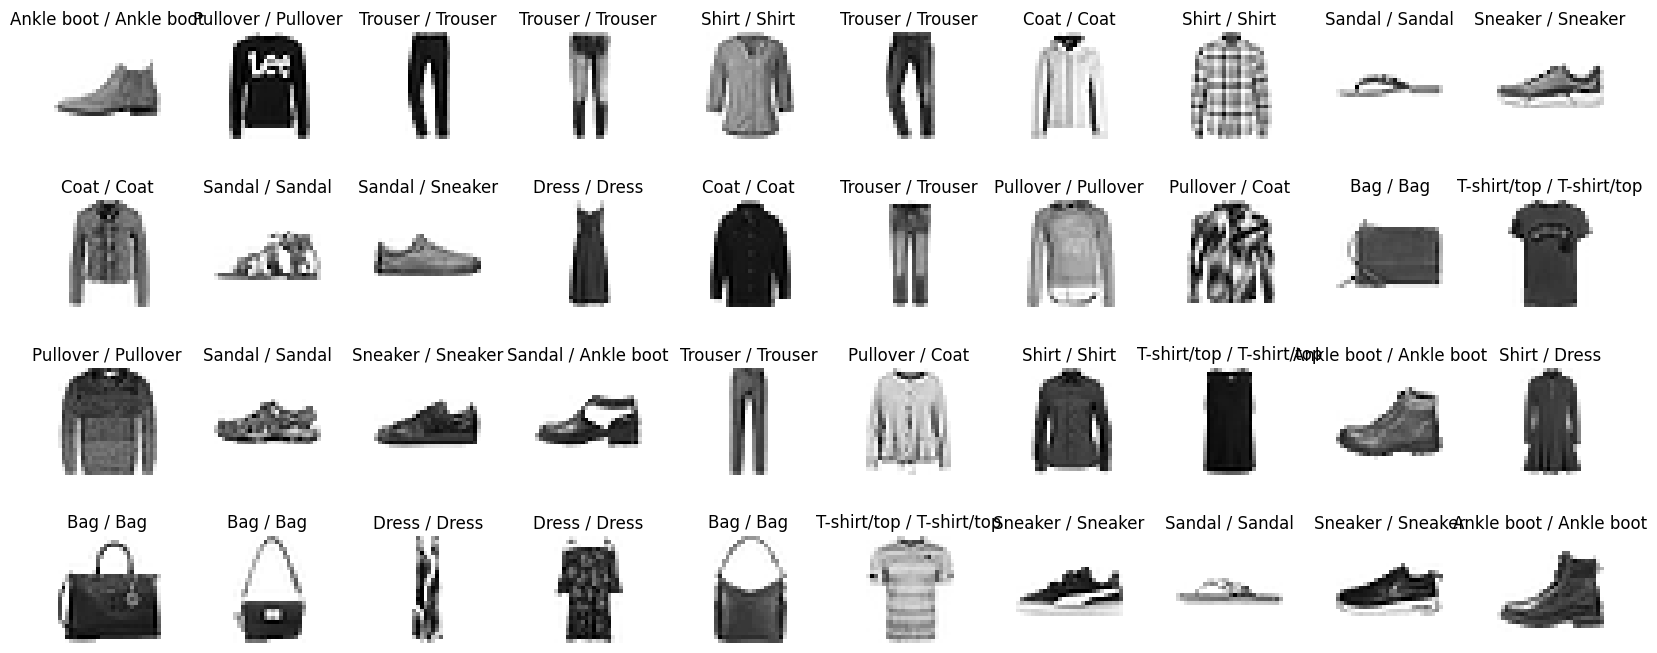

In [144]:
plt.figure(figsize=(n_cols * 2, n_rows * 2))
for row in range(n_rows):
    for col in range(n_cols):
        idx = row * n_cols +col
        plt.subplot(n_rows,n_cols,idx+1)
        plt.imshow(X_test[idx],interpolation="nearest",cmap="binary")
        plt.title(f"{class_names[test_pred[idx]]} / {class_names[y_test[idx]]}")
        plt.axis("off")
plt.subplots_adjust(wspace=0.5,hspace=0.5)
plt.show()


